## Importando bibiliotecas e lendo o dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


enem = pd.read_csv('enem_2021.csv', delimiter = ';')  ## Base de dados ENEM de 2021
ed_basica = pd.read_csv('ed_basica_2020.csv', delimiter = ';') ## Base de dados educação básica 2020

## Criando tabela de metadados e adcionando dados destritivos das variáveis 
## ENEM

In [2]:
# extrair nome das colunas
nomes_colunas = enem.columns.tolist()

# extrair tipos de dados
tipos_dados = enem.dtypes.tolist()

# extrair número de valores nulos
num_nulos = enem.isnull().sum().tolist()

# criar lista com exemplos de valores e origem dos dados
exemplos = []
for coluna in nomes_colunas:
    exemplo = enem[coluna][0]
    exemplos.append(exemplo)
origem = ['enem_2021'] * len(nomes_colunas)

# criar DataFrame com as informações extraídas
metadata_enem = pd.DataFrame({
    'Variável': nomes_colunas,
    'Tipo': tipos_dados,
    'Exemplo': exemplos,
    '% Nulos': [round((nulos / enem.shape[0]) * 100, 2) for nulos in num_nulos],
    'Origem': origem
})

# definir formato de exibição dos números em ponto flutuante
pd.options.display.float_format = '{:.2f}'.format

# criar DataFrame com as informações do describe
desc = enem.describe().T.reset_index().rename(columns={'index': 'Variável'})
desc = desc[['Variável', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# concatenar DataFrames
metadata_enem = pd.concat([metadata_enem, desc], axis=1)

# exibir tabela de metadados
metadata_enem


,Variável,Tipo,Exemplo,% Nulos,Origem,Variável,count,mean,std,min,25%,50%,75%,max
0,Unnamed: 0,int64,0,0.00,enem_2021,Unnamed: 0,3389832.00,1694915.50,978560.35,0.00,847457.75,1694915.50,2542373.25,3389831.00
1,NU_ANO,int64,2021,0.00,enem_2021,NU_ANO,3389832.00,2021.00,0.00,2021.00,2021.00,2021.00,2021.00,2021.00
2,TP_ST_CONCLUSAO,int64,1,0.00,enem_2021,TP_ST_CONCLUSAO,3389832.00,1.61,0.72,1.00,1.00,1.00,2.00,4.00
3,TP_ANO_CONCLUIU,int64,3,0.00,enem_2021,TP_ANO_CONCLUIU,3389832.00,2.58,4.28,0.00,0.00,0.00,3.00,15.00
4,TP_ESCOLA,int64,1,0.00,enem_2021,TP_ESCOLA,3389832.00,1.40,0.59,1.00,1.00,1.00,2.00,3.00
5,IN_TREINEIRO,int64,0,0.00,enem_2021,IN_TREINEIRO,3389832.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00
6,NO_MUNICIPIO_ESC,object,NaN,75.99,enem_2021,TP_DEPENDENCIA_ADM_ESC,813806.00,2.47,0.94,1.00,2.00,2.00,4.00,4.00
7,SG_UF_ESC,object,NaN,75.99,enem_2021,TP_LOCALIZACAO_ESC,813806.00,1.03,0.18,1.00,1.00,1.00,1.00,2.00
8,TP_DEPENDENCIA_ADM_ESC,float64,NaN,75.99,enem_2021,TP_PRESENCA_CN,3389832.00,0.66,0.47,0.00,0.00,1.00,1.00,2.00
9,TP_LOCALIZACAO_ESC,float64,NaN,75.99,enem_2021,TP_PRESENCA_CH,3389832.00,0.70,0.46,0.00,0.00,1.00,1.00,2.00


## Criando tabela de metadados e adcionando dados destritivos das variáveis
## Educação Básica


In [3]:
# extrair nome das colunas
nomes_colunas = ed_basica.columns.tolist()

# extrair tipos de dados
tipos_dados = ed_basica.dtypes.tolist()

# extrair número de valores nulos
num_nulos = ed_basica.isnull().sum().tolist()

# criar lista com exemplos de valores e origem dos dados
exemplos = []
for coluna in nomes_colunas:
    exemplo = ed_basica[coluna][0]
    exemplos.append(exemplo)
origem = ['ed_basica'] * len(nomes_colunas)

# criar DataFrame com as informações extraídas
metadata_ed_basica = pd.DataFrame({
    'Variável': nomes_colunas,
    'Tipo': tipos_dados,
    'Exemplo': exemplos,
    '% Nulos': [round((nulos / ed_basica.shape[0]) * 100, 2) for nulos in num_nulos],
    'Origem': origem
})

# definir formato de exibição dos números em ponto flutuante
pd.options.display.float_format = '{:.2f}'.format

# criar DataFrame com as informações do describe
desc = ed_basica.describe().T.reset_index().rename(columns={'index': 'Variável'})
desc = desc[['Variável', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# concatenar DataFrames
metadata_ed_basica = pd.concat([metadata_ed_basica, desc], axis=1)

# exibir tabela de metadados
metadata_ed_basica


,Variável,Tipo,Exemplo,% Nulos,Origem,Variável,count,mean,std,min,25%,50%,75%,max
0,Unnamed: 0,int64,0,0.00,ed_basica,Unnamed: 0,224229.00,112114.00,64729.48,0.00,56057.00,112114.00,168171.00,224228.00
1,NU_ANO_CENSO,int64,2020,0.00,ed_basica,NU_ANO_CENSO,224229.00,2020.00,0.00,2020.00,2020.00,2020.00,2020.00,2020.00
2,NO_REGIAO,object,Norte,0.00,ed_basica,CO_ENTIDADE,224229.00,30273997.97,9410084.53,11000023.00,23249650.00,31062651.00,35235246.00,53088034.00
3,SG_UF,object,RO,0.00,ed_basica,TP_DEPENDENCIA,224229.00,3.07,0.62,1.00,3.00,3.00,3.00,4.00
4,NO_MUNICIPIO,object,Alta Floresta D'Oeste,0.00,ed_basica,TP_CATEGORIA_ESCOLA_PRIVADA,224229.00,0.30,0.82,0.00,0.00,0.00,0.00,4.00
5,NO_MICRORREGIAO,object,Cacoal,0.00,ed_basica,TP_LOCALIZACAO,224229.00,1.36,0.48,1.00,1.00,1.00,2.00,2.00
6,CO_ENTIDADE,int64,11022558,0.00,ed_basica,IN_VINCULO_SECRETARIA_EDUCACAO,224229.00,0.62,0.49,0.00,0.00,1.00,1.00,1.00
7,NO_ENTIDADE,object,EIEEF HAP BITT TUPARI,0.00,ed_basica,IN_AGUA_FILTRADA,224229.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,TP_DEPENDENCIA,int64,2,0.00,ed_basica,IN_AGUA_POTAVEL,224229.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
9,TP_CATEGORIA_ESCOLA_PRIVADA,int64,0,0.00,ed_basica,IN_ENERGIA_INEXISTENTE,224229.00,0.02,0.13,0.00,0.00,0.00,0.00,1.00


## Criar tabela de distribuição de Frequência Absoluta
## Educação Básica


In [4]:
# extrair nome das colunas
nomes_colunas = ed_basica.columns.tolist()

# extrair tipos de dados
tipos_dados = ed_basica.dtypes.tolist()

# extrair número de valores nulos
num_nulos = ed_basica.isnull().sum().tolist()

for coluna in nomes_colunas:
    if ed_basica[coluna].dtype == 'object':
        dist_freq = pd.DataFrame({'Valor': ed_basica[coluna].value_counts().index, 'Frequência Absoluta': ed_basica[coluna].value_counts().values})
        dist_freq['Frequência Relativa'] = dist_freq['Frequência Absoluta'] / dist_freq['Frequência Absoluta'].sum()
    else:
        dist_freq = pd.DataFrame({'Valor': ed_basica[coluna].value_counts().index, 'Frequência Absoluta': ed_basica[coluna].value_counts().values})
        dist_freq = dist_freq.sort_values(by='Valor')
        dist_freq['Frequência Relativa'] = dist_freq['Frequência Absoluta'] / dist_freq['Frequência Absoluta'].sum()
        variancia = np.var(dist_freq['Valor'], ddof=1)
        desvio_padrao = np.std(dist_freq['Valor'], ddof=1)
        amplitude = dist_freq['Valor'].max() - dist_freq['Valor'].min()
        dist_freq = dist_freq[['Valor', 'Frequência Absoluta']]
        dist_freq['Variância'] = variancia
        dist_freq['Desvio Padrão'] = desvio_padrao
        dist_freq['Amplitude'] = amplitude
    print(f'Distribuição de Frequência da Variável {coluna} - Frequência Absoluta:')
    print(dist_freq)
    print('\n')



Distribuição de Frequência da Variável Unnamed: 0 - Frequência Absoluta:
         Valor  Frequência Absoluta     Variância  Desvio Padrão  Amplitude
0            0                    1 4189905722.50       64729.48     224228
112115       1                    1 4189905722.50       64729.48     224228
149482       2                    1 4189905722.50       64729.48     224228
149483       3                    1 4189905722.50       64729.48     224228
149484       4                    1 4189905722.50       64729.48     224228
...        ...                  ...           ...            ...        ...
74749   224224                    1 4189905722.50       64729.48     224228
74750   224225                    1 4189905722.50       64729.48     224228
74751   224226                    1 4189905722.50       64729.48     224228
74752   224227                    1 4189905722.50       64729.48     224228
224228  224228                    1 4189905722.50       64729.48     224228

[224229 rows x

## Criar tabela de distribuição de Frequência Relativa
## Educação Básica

In [5]:
# extrair nome das colunas
nomes_colunas = ed_basica.columns.tolist()

# extrair tipos de dados
tipos_dados = ed_basica.dtypes.tolist()

# extrair número de valores nulos
num_nulos = ed_basica.isnull().sum().tolist()

for coluna in nomes_colunas:
    if ed_basica[coluna].dtype == 'object':
        dist_freq = pd.DataFrame({'Valor': ed_basica[coluna].value_counts().index, 'Frequência Absoluta': ed_basica[coluna].value_counts().values})
        dist_freq['Frequência Relativa'] = dist_freq['Frequência Absoluta'] / dist_freq['Frequência Absoluta'].sum()
    else:
        dist_freq = pd.DataFrame({'Valor': ed_basica[coluna].value_counts().index, 'Frequência Absoluta': ed_basica[coluna].value_counts().values})
        dist_freq = dist_freq.sort_values(by='Valor')
        dist_freq['Frequência Relativa'] = dist_freq['Frequência Absoluta'] / dist_freq['Frequência Absoluta'].sum()
        media = np.mean(dist_freq['Valor'])
        desvio_padrao = np.std(dist_freq['Valor'], ddof=1)
        coeficiente_variacao = (desvio_padrao / media) * 100
        dist_freq = dist_freq[['Valor', 'Frequência Relativa']]
        dist_freq['Média'] = media
        dist_freq['Desvio Padrão'] = desvio_padrao
        dist_freq['Coeficiente de Variação'] = coeficiente_variacao
    print(f'Distribuição de Frequência da Variável {coluna} - Frequência Relativa:')
    print(dist_freq)
    print('\n')

Distribuição de Frequência da Variável Unnamed: 0 - Frequência Relativa:
         Valor  Frequência Relativa     Média  Desvio Padrão  \
0            0                 0.00 112114.00       64729.48   
112115       1                 0.00 112114.00       64729.48   
149482       2                 0.00 112114.00       64729.48   
149483       3                 0.00 112114.00       64729.48   
149484       4                 0.00 112114.00       64729.48   
...        ...                  ...       ...            ...   
74749   224224                 0.00 112114.00       64729.48   
74750   224225                 0.00 112114.00       64729.48   
74751   224226                 0.00 112114.00       64729.48   
74752   224227                 0.00 112114.00       64729.48   
224228  224228                 0.00 112114.00       64729.48   

        Coeficiente de Variação  
0                         57.74  
112115                    57.74  
149482                    57.74  
149483                

ZeroDivisionError: float division by zero

## Criar tabela de distribuição de Frequência Absoluta
## ENEM

In [6]:
# extrair nome das colunas
nomes_colunas = enem.columns.tolist()

# extrair tipos de dados
tipos_dados = enem.dtypes.tolist()

# extrair número de valores nulos
num_nulos = enem.isnull().sum().tolist()

for coluna in nomes_colunas:
    if enem[coluna].dtype == 'object':
        dist_freq = pd.DataFrame({'Valor': enem[coluna].value_counts().index, 'Frequência Absoluta': enem[coluna].value_counts().values})
        dist_freq['Frequência Relativa'] = dist_freq['Frequência Absoluta'] / dist_freq['Frequência Absoluta'].sum()
    else:
        dist_freq = pd.DataFrame({'Valor': enem[coluna].value_counts().index, 'Frequência Absoluta': enem[coluna].value_counts().values})
        dist_freq = dist_freq.sort_values(by='Valor')
        dist_freq['Frequência Relativa'] = dist_freq['Frequência Absoluta'] / dist_freq['Frequência Absoluta'].sum()
        variancia = np.var(dist_freq['Valor'], ddof=1)
        desvio_padrao = np.std(dist_freq['Valor'], ddof=1)
        amplitude = dist_freq['Valor'].max() - dist_freq['Valor'].min()
        dist_freq = dist_freq[['Valor', 'Frequência Absoluta']]
        dist_freq['Variância'] = variancia
        dist_freq['Desvio Padrão'] = desvio_padrao
        dist_freq['Amplitude'] = amplitude
    print(f'Distribuição de Frequência da Variável {coluna} - Frequência Absoluta:')
    print(dist_freq)
    print('\n')

Distribuição de Frequência da Variável Unnamed: 0 - Frequência Absoluta:
           Valor  Frequência Absoluta       Variância  Desvio Padrão  \
0              0                    1 957580364838.75      978560.35   
211865         1                    1 957580364838.75      978560.35   
2259885        2                    1 957580364838.75      978560.35   
2259886        3                    1 957580364838.75      978560.35   
2259887        4                    1 957580364838.75      978560.35   
...          ...                  ...             ...            ...   
1129950  3389827                    1 957580364838.75      978560.35   
1129951  3389828                    1 957580364838.75      978560.35   
1129952  3389829                    1 957580364838.75      978560.35   
1129953  3389830                    1 957580364838.75      978560.35   
3389831  3389831                    1 957580364838.75      978560.35   

         Amplitude  
0          3389831  
211865     3389831  

## Criar tabela de distribuição de Frequência Relativa
## ENEM

In [7]:
# extrair nome das colunas
nomes_colunas = enem.columns.tolist()

# extrair tipos de dados
tipos_dados = enem.dtypes.tolist()

# extrair número de valores nulos
num_nulos = enem.isnull().sum().tolist()

for coluna in nomes_colunas:
    if enem[coluna].dtype == 'object':
        dist_freq = pd.DataFrame({'Valor': enem[coluna].value_counts().index, 'Frequência Absoluta': enem[coluna].value_counts().values})
        dist_freq['Frequência Relativa'] = dist_freq['Frequência Absoluta'] / dist_freq['Frequência Absoluta'].sum()
    else:
        dist_freq = pd.DataFrame({'Valor': enem[coluna].value_counts().index, 'Frequência Absoluta': enem[coluna].value_counts().values})
        dist_freq = dist_freq.sort_values(by='Valor')
        dist_freq['Frequência Relativa'] = dist_freq['Frequência Absoluta'] / dist_freq['Frequência Absoluta'].sum()
        media = np.mean(dist_freq['Valor'])
        desvio_padrao = np.std(dist_freq['Valor'], ddof=1)
        coeficiente_variacao = (desvio_padrao / media) * 100
        dist_freq = dist_freq[['Valor', 'Frequência Relativa']]
        dist_freq['Média'] = media
        dist_freq['Desvio Padrão'] = desvio_padrao
        dist_freq['Coeficiente de Variação'] = coeficiente_variacao
    print(f'Distribuição de Frequência da Variável {coluna} - Frequência Relativa:')
    print(dist_freq)
    print('\n')

Distribuição de Frequência da Variável Unnamed: 0 - Frequência Relativa:
           Valor  Frequência Relativa      Média  Desvio Padrão  \
0              0                 0.00 1694915.50      978560.35   
211865         1                 0.00 1694915.50      978560.35   
2259885        2                 0.00 1694915.50      978560.35   
2259886        3                 0.00 1694915.50      978560.35   
2259887        4                 0.00 1694915.50      978560.35   
...          ...                  ...        ...            ...   
1129950  3389827                 0.00 1694915.50      978560.35   
1129951  3389828                 0.00 1694915.50      978560.35   
1129952  3389829                 0.00 1694915.50      978560.35   
1129953  3389830                 0.00 1694915.50      978560.35   
3389831  3389831                 0.00 1694915.50      978560.35   

         Coeficiente de Variação  
0                          57.74  
211865                     57.74  
2259885          

## Determinação Outliers
## Educação Básica

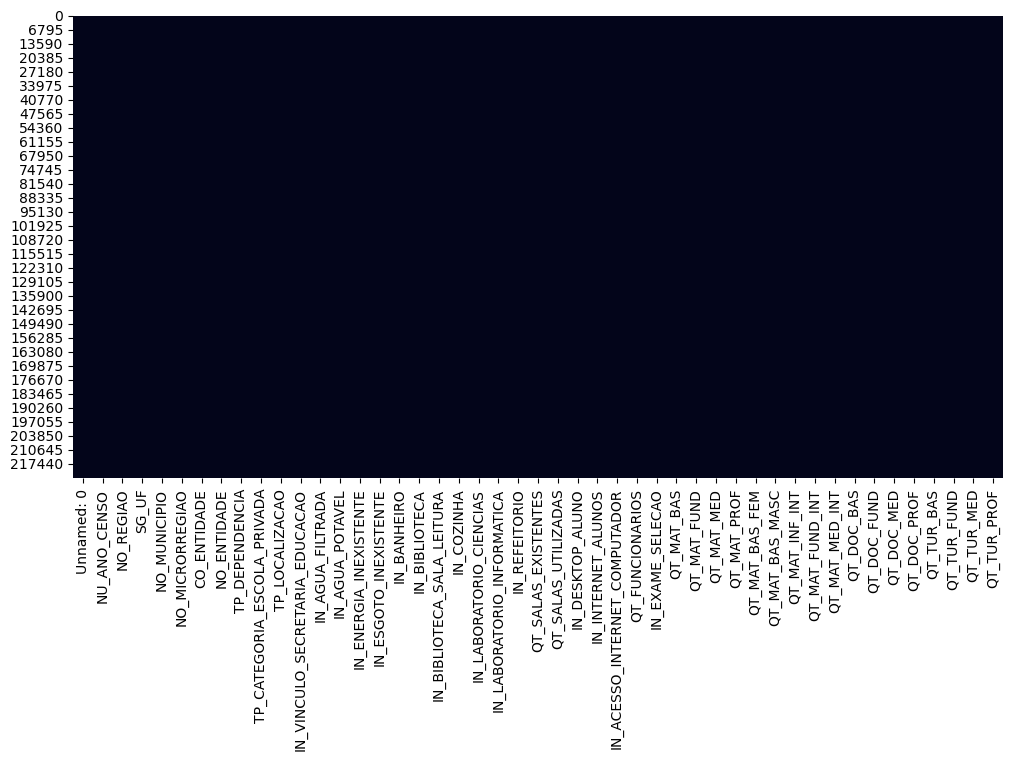

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(ed_basica.isnull(), cbar=False)
plt.show()

## Determinação Outliers
## ENEM

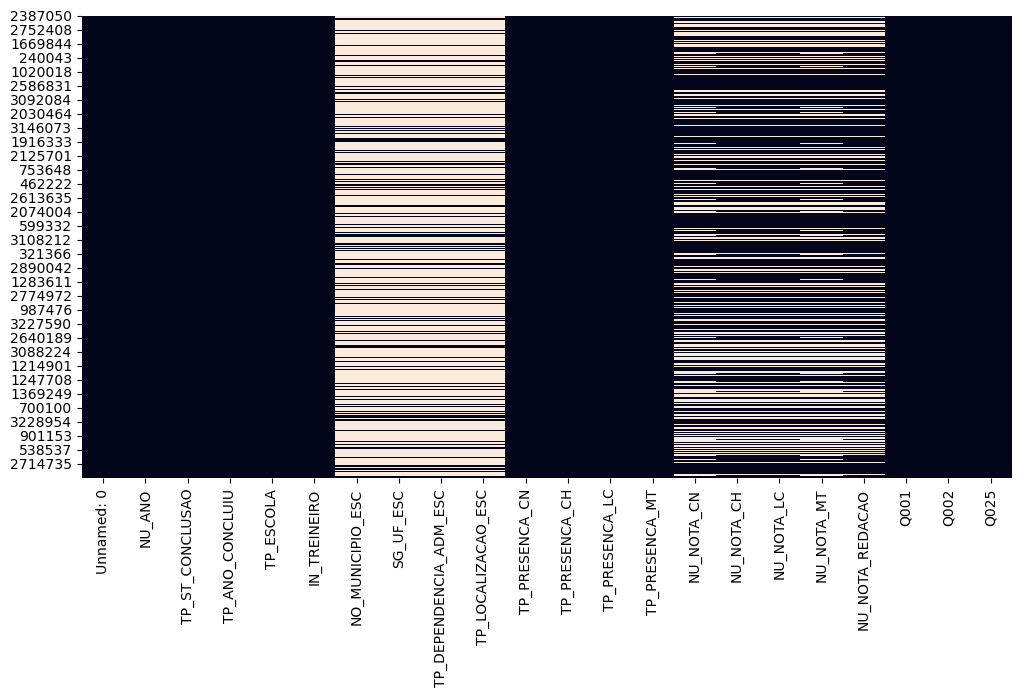

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(enem.sample(frac=0.1).isnull(), cbar=False) 
plt.show()
## foi retirado uma amostra pois pelo tamanho do Dataset não era possivel manipular

## HeatMap com correlações 
## Educação Básica

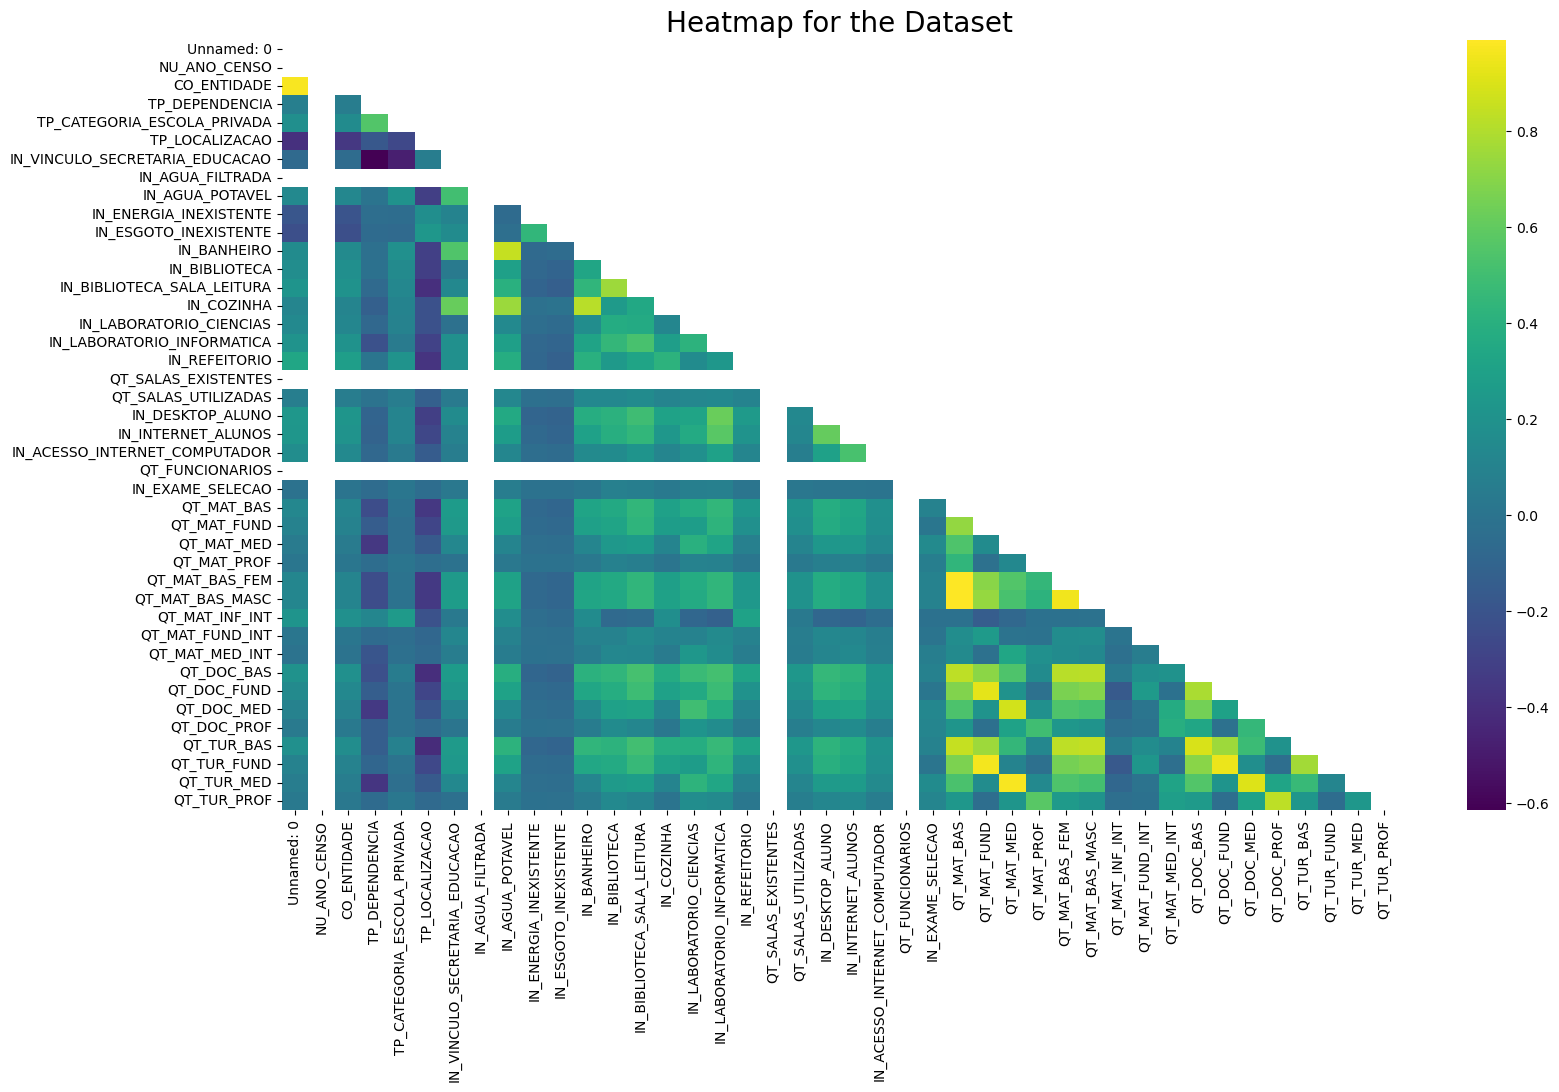

In [10]:

plt.rcParams['figure.figsize'] = (18, 10)

corr = ed_basica.corr()
matrix = np.triu(corr)

sns.heatmap(corr, annot = False, cmap = "viridis", mask = matrix)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()


## HeatMap com correlações
## ENEM

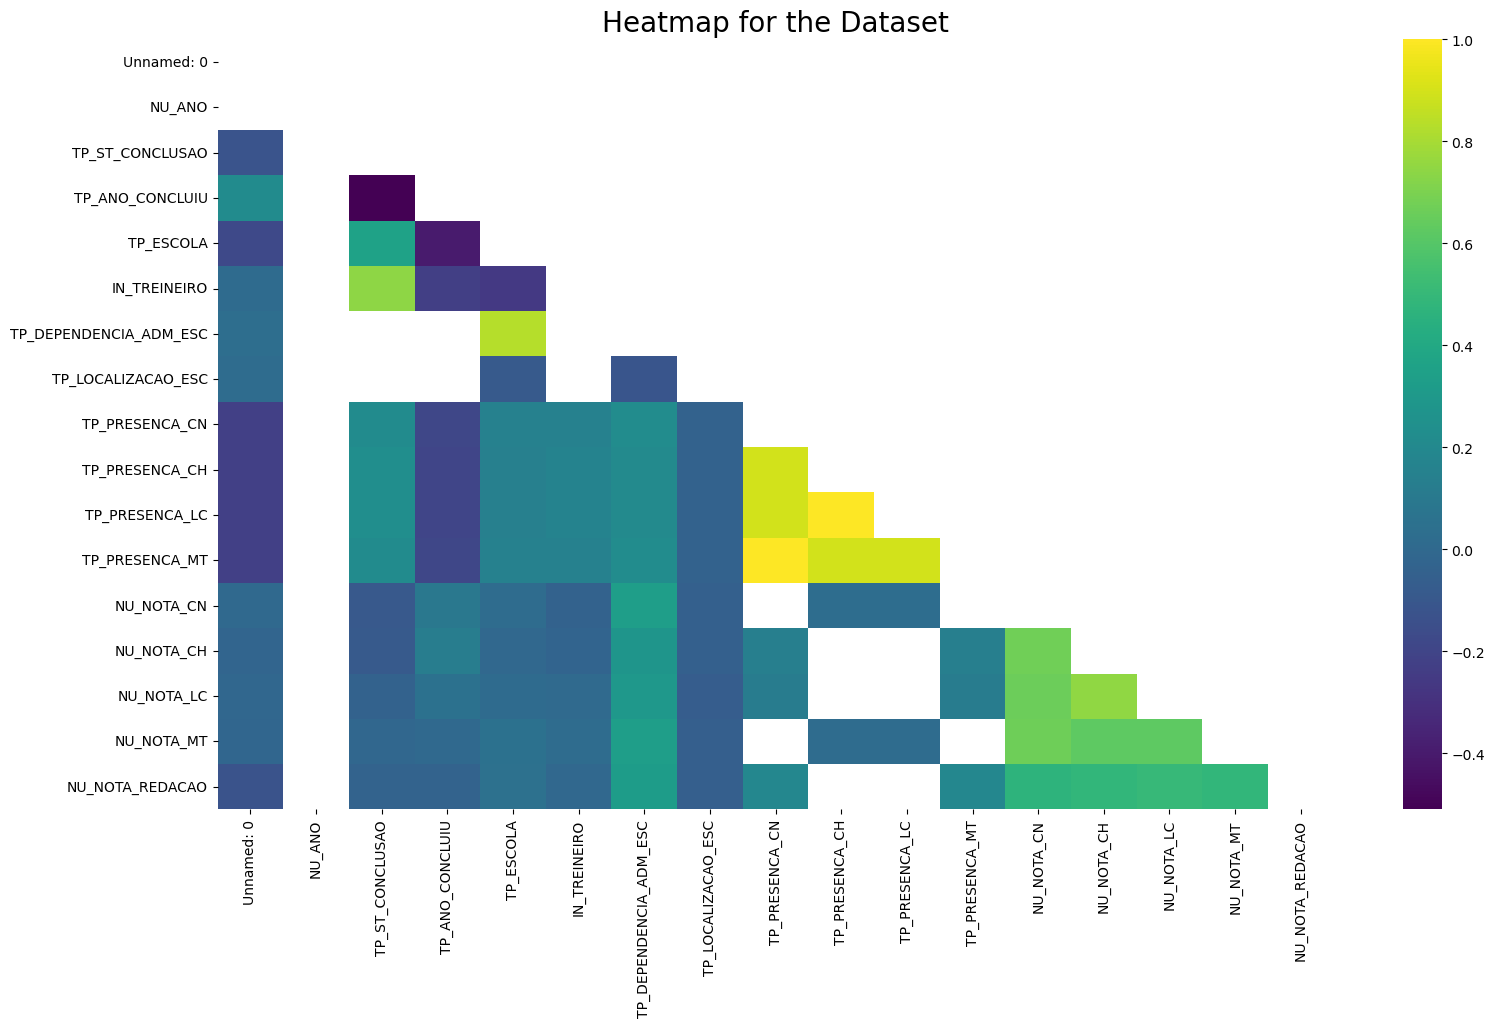

In [11]:
plt.rcParams['figure.figsize'] = (18, 10)

corr = enem.corr()
matrix = np.triu(corr)

sns.heatmap(corr, annot = False, cmap = "viridis", mask = matrix)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()
